In [ ]:
!pip install ultralytics
!pip install onnx

# Pytorch Inference


0: 384x640 1 person, 2 cars, 2 giraffes, 140.3ms
Speed: 4.4ms preprocess, 140.3ms inference, 1.9ms postprocess per image at shape (1, 3, 384, 640)


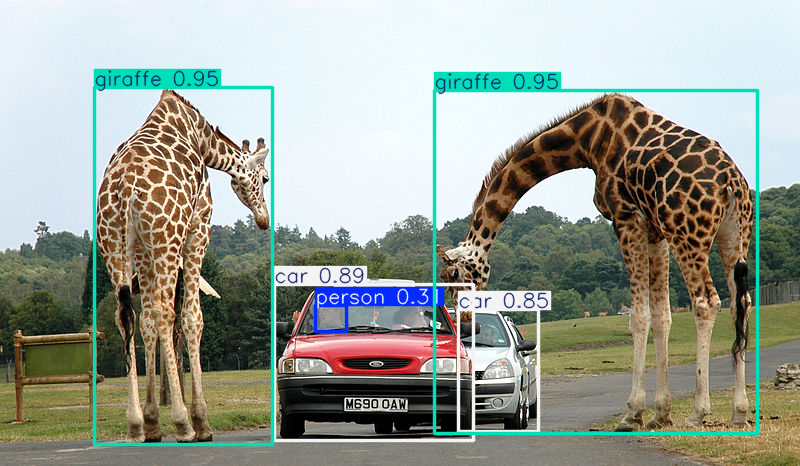

In [ ]:
from ultralytics import YOLO

# Load a model
model = YOLO("yolo11n.pt")  # pretrained YOLO11n model

# Run batched inference on a list of images
results = model(["image-2.png"])  # return a list of Results objects

# Process results list
for result in results:
    boxes = result.boxes  # Boxes object for bounding box outputs
    masks = result.masks  # Masks object for segmentation masks outputs
    keypoints = result.keypoints  # Keypoints object for pose outputs
    probs = result.probs  # Probs object for classification outputs
    obb = result.obb  # Oriented boxes object for OBB outputs
    result.show()  # display to screen
    result.save(filename="result.jpg")  # save to disk

# ONNX Inference

Ultralytics 8.3.228 🚀 Python-3.12.12 torch-2.8.0+cu126 CPU (Intel Xeon CPU @ 2.20GHz)

PyTorch: starting from 'yolo11n.pt' with input shape (1, 3, 640, 640) BCHW and output shape(s) (1, 84, 8400) (5.4 MB)

ONNX: starting export with onnx 1.19.1 opset 22...
ONNX: slimming with onnxslim 0.1.74...
ONNX: export success ✅ 1.1s, saved as 'yolo11n.onnx' (10.2 MB)

Export complete (1.6s)
Results saved to /content
Predict:         yolo predict task=detect model=yolo11n.onnx imgsz=640  
Validate:        yolo val task=detect model=yolo11n.onnx imgsz=640 data=/usr/src/ultralytics/ultralytics/cfg/datasets/coco.yaml  
Visualize:       https://netron.app
WARNING ⚠️ Unable to automatically guess model task, assuming 'task=detect'. Explicitly define task for your model, i.e. 'task=detect', 'segment', 'classify','pose' or 'obb'.
Loading yolo11n.onnx for ONNX Runtime inference...
Using ONNX Runtime 1.24.0.dev20251031003 CPUExecutionProvider

image 1/1 /content/image-2.png: 640x640 1 person, 2 cars, 2 gir

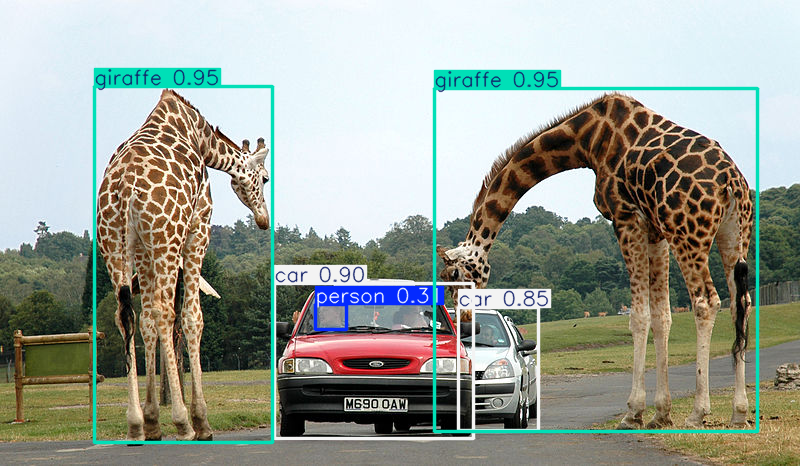

In [ ]:
# Export the model to ONNX format
model.export(format="onnx")  # creates 'yolo11n.onnx'

# Load the exported ONNX model
onnx_model = YOLO("yolo11n.onnx")

# Run inference
results = onnx_model("/content/image-2.png")

# Process results list
for result in results:
    boxes = result.boxes  # Boxes object for bounding box outputs
    masks = result.masks  # Masks object for segmentation masks outputs
    keypoints = result.keypoints  # Keypoints object for pose outputs
    probs = result.probs  # Probs object for classification outputs
    obb = result.obb  # Oriented boxes object for OBB outputs
    result.show()  # display to screen
    result.save(filename="result_onnx.jpg")  # save to disk

# Final Solution

Starting YOLO11 PyTorch to ONNX Conversion Pipeline...

[Step 1] Loading PyTorch model...
[Step 1] Running PyTorch inference...

0: 384x640 1 person, 2 cars, 2 giraffes, 145.8ms
Speed: 5.7ms preprocess, 145.8ms inference, 1.7ms postprocess per image at shape (1, 3, 384, 640)


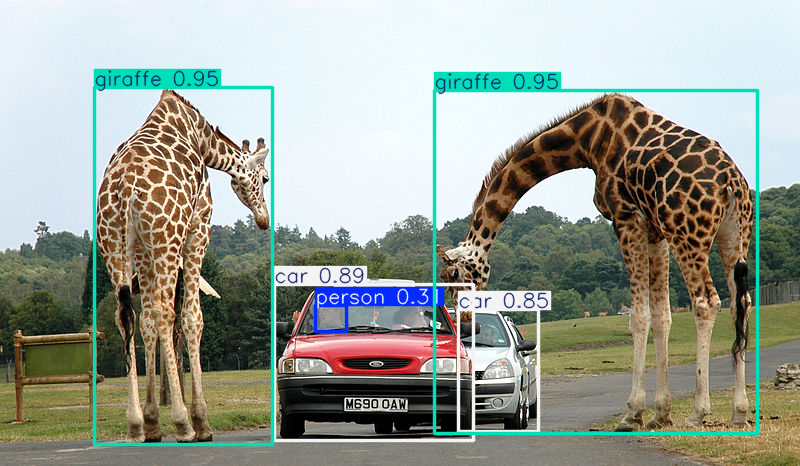


PyTorch Model Results
Number of detections: 5

Detection 1:
  Class: giraffe
  Confidence: 0.949
  Bounding Box: [434.1, 90.2, 757.0, 433.3]

Detection 2:
  Class: giraffe
  Confidence: 0.945
  Bounding Box: [94.6, 87.9, 272.3, 444.3]

Detection 3:
  Class: car
  Confidence: 0.888
  Bounding Box: [274.8, 284.9, 473.7, 440.9]

Detection 4:
  Class: car
  Confidence: 0.848
  Bounding Box: [458.4, 309.2, 539.0, 431.7]

Detection 5:
  Class: person
  Confidence: 0.307
  Bounding Box: [315.1, 305.3, 346.1, 331.1]

[Step 2] Exporting model to ONNX format...
Ultralytics 8.3.228 🚀 Python-3.12.12 torch-2.8.0+cu126 CPU (Intel Xeon CPU @ 2.20GHz)

PyTorch: starting from 'yolo11n.pt' with input shape (1, 3, 640, 640) BCHW and output shape(s) (1, 84, 8400) (5.4 MB)

ONNX: starting export with onnx 1.19.1 opset 22...
ONNX: slimming with onnxslim 0.1.74...
ONNX: export success ✅ 4.5s, saved as 'yolo11n.onnx' (10.2 MB)

Export complete (5.3s)
Results saved to /content
Predict:         yolo predict ta

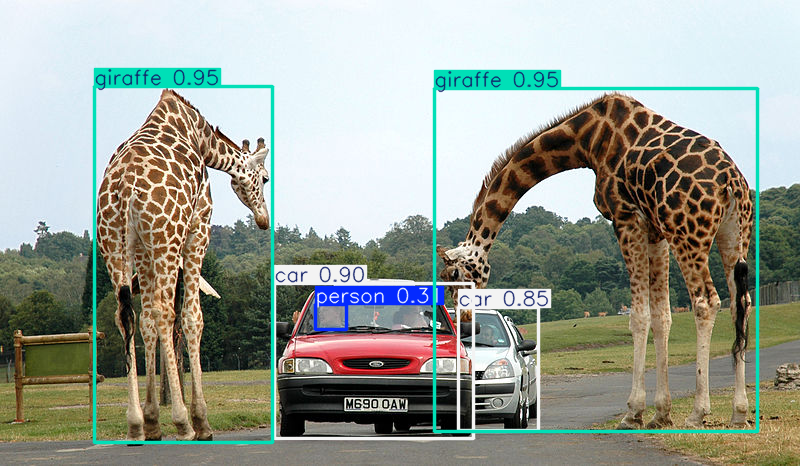


ONNX Model Results
Number of detections: 5

Detection 1:
  Class: giraffe
  Confidence: 0.951
  Bounding Box: [434.0, 88.8, 757.1, 431.9]

Detection 2:
  Class: giraffe
  Confidence: 0.948
  Bounding Box: [94.5, 86.5, 272.2, 442.5]

Detection 3:
  Class: car
  Confidence: 0.902
  Bounding Box: [274.8, 283.7, 473.7, 438.9]

Detection 4:
  Class: car
  Confidence: 0.847
  Bounding Box: [458.4, 308.0, 538.8, 430.3]

Detection 5:
  Class: person
  Confidence: 0.313
  Bounding Box: [315.2, 304.1, 346.1, 329.8]

[Step 4] Comparing PyTorch and ONNX predictions...

IoU Comparison (PyTorch vs ONNX)
Detection 1 IoU: 0.9917 (Excellent match ✓)
Detection 2 IoU: 0.9902 (Excellent match ✓)
Detection 3 IoU: 0.9794 (Excellent match ✓)
Detection 4 IoU: 0.9775 (Excellent match ✓)
Detection 5 IoU: 0.9035 (Good match)

Average IoU: 0.9685
✓ Models produce nearly identical results!

Pipeline completed successfully!

Output files created:
  - result_pytorch.jpg (PyTorch predictions)
  - result_onnx.jpg (ON

In [ ]:
"""
Complete YOLO11 Model Inference and ONNX Conversion Script
===========================================================

Requirements Installation:
pip install ultralytics torch torchvision onnx onnxruntime opencv-python numpy pillow

This script performs:
1. PyTorch model inference on image.png
2. Model conversion to ONNX format
3. ONNX model inference on the same image
4. Comparison of results with IoU metrics
"""

from ultralytics import YOLO
import cv2
import numpy as np
import onnx

def calculate_iou(box1, box2):
    """Calculate Intersection over Union between two bounding boxes"""
    x1_min, y1_min, x1_max, y1_max = box1
    x2_min, y2_min, x2_max, y2_max = box2

    # Calculate intersection
    inter_x_min = max(x1_min, x2_min)
    inter_y_min = max(y1_min, y2_min)
    inter_x_max = min(x1_max, x2_max)
    inter_y_max = min(y1_max, y2_max)

    if inter_x_max < inter_x_min or inter_y_max < inter_y_min:
        return 0.0

    inter_area = (inter_x_max - inter_x_min) * (inter_y_max - inter_y_min)

    # Calculate union
    box1_area = (x1_max - x1_min) * (y1_max - y1_min)
    box2_area = (x2_max - x2_min) * (y2_max - y2_min)
    union_area = box1_area + box2_area - inter_area

    return inter_area / union_area if union_area > 0 else 0

def print_results(results, model, title):
    """Print detailed detection results"""
    print(f"\n{'='*50}")
    print(f"{title}")
    print(f"{'='*50}")

    for result in results:
        boxes = result.boxes
        print(f"Number of detections: {len(boxes)}")

        if len(boxes) == 0:
            print("No objects detected!")
            continue

        for i, box in enumerate(boxes):
            x1, y1, x2, y2 = box.xyxy[0].tolist()
            confidence = box.conf[0].item()
            class_id = int(box.cls[0].item())
            class_name = model.names[class_id]

            print(f"\nDetection {i+1}:")
            print(f"  Class: {class_name}")
            print(f"  Confidence: {confidence:.3f}")
            print(f"  Bounding Box: [{x1:.1f}, {y1:.1f}, {x2:.1f}, {y2:.1f}]")

def main():
    print("Starting YOLO11 PyTorch to ONNX Conversion Pipeline...")

    # ====================
    # 1. PyTorch Inference
    # ====================
    print("\n[Step 1] Loading PyTorch model...")
    model_pt = YOLO("yolo11n.pt")

    print("[Step 1] Running PyTorch inference...")
    results_pt = model_pt(["image-2.png"])

    # Display and save results
    for result in results_pt:
        result.show()
        result.save(filename="result_pytorch.jpg")

    # Print detailed results
    print_results(results_pt, model_pt, "PyTorch Model Results")

    # ====================
    # 2. Export to ONNX
    # ====================
    print("\n[Step 2] Exporting model to ONNX format...")
    model_pt.export(format="onnx")
    print("✓ Model exported to yolo11n.onnx")

    # Validate ONNX model
    print("[Step 2] Validating ONNX model...")
    onnx_model_check = onnx.load("yolo11n.onnx")
    onnx.checker.check_model(onnx_model_check)
    print("✓ ONNX model is valid!")

    # ====================
    # 3. ONNX Inference
    # ====================
    print("\n[Step 3] Loading ONNX model...")
    model_onnx = YOLO("yolo11n.onnx")

    print("[Step 3] Running ONNX inference...")
    results_onnx = model_onnx("image-2.png")

    # Display and save results
    for result in results_onnx:
        result.show()
        result.save(filename="result_onnx.jpg")

    # Print detailed results
    print_results(results_onnx, model_onnx, "ONNX Model Results")

    # ====================
    # 4. IoU Comparison
    # ====================
    print("\n[Step 4] Comparing PyTorch and ONNX predictions...")

    # Extract boxes from both models
    pt_boxes = []
    onnx_boxes = []

    if len(results_pt[0].boxes) > 0:
        for box in results_pt[0].boxes:
            pt_boxes.append(box.xyxy[0].tolist())

    if len(results_onnx[0].boxes) > 0:
        for box in results_onnx[0].boxes:
            onnx_boxes.append(box.xyxy[0].tolist())

    # Calculate IoU for matching detections
    print(f"\n{'='*50}")
    print("IoU Comparison (PyTorch vs ONNX)")
    print(f"{'='*50}")

    if len(pt_boxes) != len(onnx_boxes):
        print(f"Warning: Different number of detections!")
        print(f"  PyTorch: {len(pt_boxes)} detections")
        print(f"  ONNX: {len(onnx_boxes)} detections")

    min_len = min(len(pt_boxes), len(onnx_boxes))

    if min_len == 0:
        print("No detections to compare!")
    else:
        ious = []
        for i in range(min_len):
            iou = calculate_iou(pt_boxes[i], onnx_boxes[i])
            ious.append(iou)
            print(f"Detection {i+1} IoU: {iou:.4f} ", end="")
            if iou > 0.95:
                print("(Excellent match ✓)")
            elif iou > 0.8:
                print("(Good match)")
            else:
                print("(Poor match - investigate)")

        avg_iou = np.mean(ious)
        print(f"\nAverage IoU: {avg_iou:.4f}")

        if avg_iou > 0.95:
            print("✓ Models produce nearly identical results!")
        elif avg_iou > 0.8:
            print("⚠ Models produce similar but not identical results")
        else:
            print("✗ Significant differences detected - review conversion")

    print("\n" + "="*50)
    print("Pipeline completed successfully!")
    print("="*50)
    print("\nOutput files created:")
    print("  - result_pytorch.jpg (PyTorch predictions)")
    print("  - result_onnx.jpg (ONNX predictions)")
    print("  - yolo11n.onnx (Converted ONNX model)")

if __name__ == "__main__":
    main()